In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ex1data1.csv to ex1data1.csv


In [ ]:
df = pd.read_csv("ex1data1.csv", index_col=[0])
df


,x,y
1,6.1101,17.59200
2,5.5277,9.13020
3,8.5186,13.66200
4,7.0032,11.85400
5,5.8598,6.82330
...,...,...
93,5.8707,7.20290
94,5.3054,1.98690
95,8.2934,0.14454
96,13.3940,9.05510


In [ ]:
#getting data from the file and separating it as input(x) and output
x = df.iloc[:,0]
#read second column profit as output
y = df.iloc[:,1]
#m is number of training examples
m = len(y)
#viewing first few rows of data
df.head()

,x,y
1,6.1101,17.5920
2,5.5277,9.1302
3,8.5186,13.6620
4,7.0032,11.8540
5,5.8598,6.8233


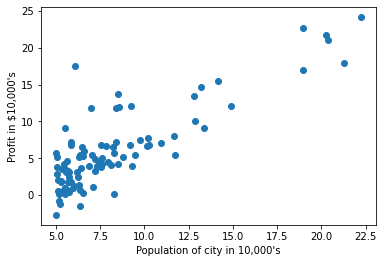

In [ ]:
#plotting the data
plt.scatter(x,y)
plt.xlabel('Population of city in 10,000\'s')
plt.ylabel('Profit in $10,000\'s')
plt.show()

In [ ]:
#Increasing the rank of both x and y for operations
x = x[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
#[theta1]
#[theta2]
iterations= 1500
alpha = 0.01
ones = np.ones((m,1))
x = np.hstack((ones,x)) #adding the ones column to x so that x*theta gives the h

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#computing the cost
def computeCost(x,y,theta):
    temp = np.dot(x,theta) - y
    return np.sum(np.power(temp,2))/(2*m)
J = computeCost(x,y,theta)
print(J)

32.072733877455676


In [ ]:
#Finding theta1 and theta2 using gradient descent
def gradientDescent(x,y,theta,alpha,iterations):
    for _ in range(iterations):
        temp = np.dot(x,theta)-y
        temp = np.dot(x.T,temp)
        theta = theta-(alpha/m)*temp
    return theta
theta = gradientDescent(x,y,theta,alpha,iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [ ]:
#compute cost using optimal theta
J = computeCost(x,y,theta)
print(J)

4.483388256587726


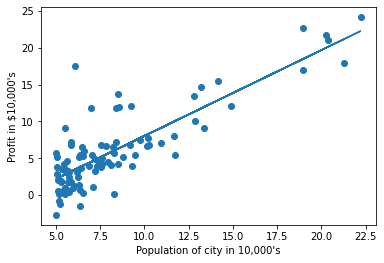

In [ ]:
#plotting
plt.scatter(x[:,1],y)
plt.xlabel('Population of city in 10,000\'s')
plt.ylabel('Profit in $10,000\'s')
plt.plot(x[:,1],np.dot(x,theta))
plt.show()

#Scikit Learn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


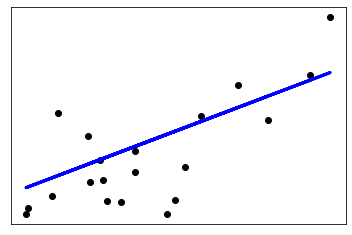

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#Logistic Regression


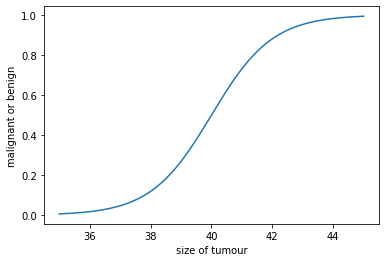

In [ ]:
x = np.linspace(-5,+5,200)
y = 1 / (1 + np.exp(-x))

plt.plot(40+x, y)
plt.xlabel('size of tumour')
plt.ylabel('malignant or benign')
plt.show()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:


# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)



Image Data Shape (1797, 64)
Label Data Shape (1797,)


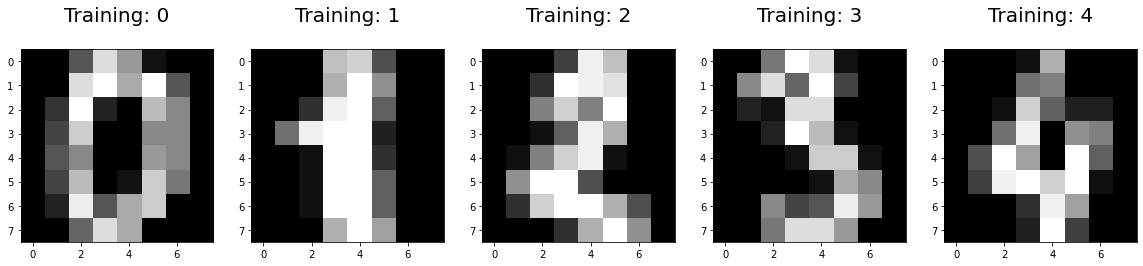

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [ ]:


from sklearn.linear_model import LogisticRegression



In [ ]:
logisticRegr = LogisticRegression()

In [ ]:


logisticRegr.fit(x_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [ ]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


Clustering

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving driver-data.csv to driver-data.csv


In [3]:
data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [4]:
from sklearn.cluster import KMeans

In [19]:
kmeans =  KMeans (n_clusters=2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ,   0.4003125 ],
       [180.017075  ,  18.29      ,   1.13      ]])

In [21]:
import numpy as np

In [22]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [23]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 3200, 1: 800}

In [13]:
import seaborn as sns

In [24]:
data["cluster"] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


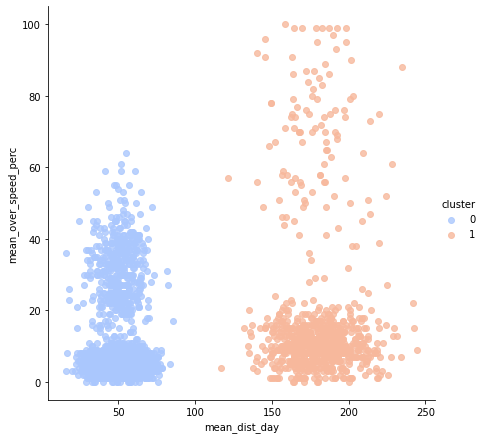

In [25]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [26]:
kmeans.inertia_

1319841.5306352186

In [27]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [28]:
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,0
3423313212,52.53,25,0
3423313724,64.54,27,0
3423311373,55.69,22,0
3423310999,54.58,25,0
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
